AI course demo 2023-01-09

This Notebook should help to understand the basic of rnn cells.

The forward path of a rnn cell was created using numpy for this purpose.

The cell itself is inspired by Starmer, J. (2022). Recurrent Neural Networks (RNNs), Clearly Explained!!! [Video]. Youtube. https://www.youtube.com/watch?v=AsNTP8Kwu80

Check out his Tutorials on Youtube!

Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()

# Activation Functions

[(-2.0, 2.0)]

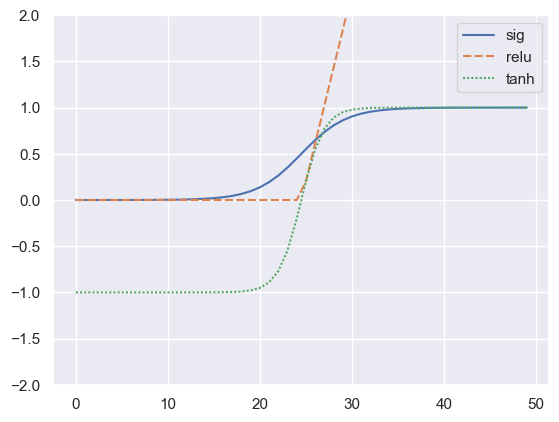

In [3]:
# activation functions
def sig(x):
    s=1/(1+np.exp(-x))  
    return s
def relu(x):
    r = np.maximum(0, x)
    return r
def tanh(x):
    t = ( 2 / (1 + np.exp(-2*x) ) ) -1
    return t
    
# plotting activation functions
x = np.linspace(-10, 10, 50)
sig_x = sig(x)
relu_x = relu(x)
tanh_x = tanh(x)
act_df = pd.DataFrame(
    {
        "sig": sig_x,
        "relu": relu_x,
        "tanh": tanh_x
    }
)
act_plot = sns.lineplot(data=act_df)
act_plot.set(ylim=(-2, 2))

# RNN in Numpy

RNN cell step by step unrolled (3 time steps)

In [5]:
# xs (input values)
x0 = 1.0
x1 = 0.5
x2 = 0.5

# weights
w1 = 1.8    # 1.8
w2 = -0.5   #-0.5
w3 = 1.1    # 1.1

# biases
b1 = 0.0    # 0.0
b2 = 0.0    # 0.0

# timestep 0
y0 = relu((x0 * w1) + b1)
o0 = y0 * w3 + b2
s0 = y0 * w2

print('timestep 0')
print('x0: '+ str(x0))
print('y0: '+ str(y0))
print('s0: '+ str(s0))
print('o0: '+ str(o0))

# timestep 1
y1 = relu((x1 * w1) + b1 + s0)
o1 = y1 * w3 + b2
s1 = y1 * w2

print('timestep 1')
print('x1: '+ str(x1))
print('y1: '+ str(y1))
print('s1: '+ str(s1))
print('o1: '+ str(o1))

# timestep 2
y2 = relu((x2 * w1) + b1 + s1)
o2 = y2 * w3 + b2
s2 = y2 * w2

print('timestep 2')
print('x2: '+ str(x2))
print('y2: '+ str(y2))
print('s2: '+ str(s2))
print('o2: '+ str(o2))

timestep 0
x0: 1.0
y0: 1.8
s0: -0.9
o0: 1.9800000000000002
timestep 1
x1: 0.5
y1: 0.0
s1: -0.0
o1: 0.0
timestep 2
x2: 0.5
y2: 0.9
s2: -0.45
o2: 0.9900000000000001


... creating more timesteps

Text(0.5, 0, 'time in steps')

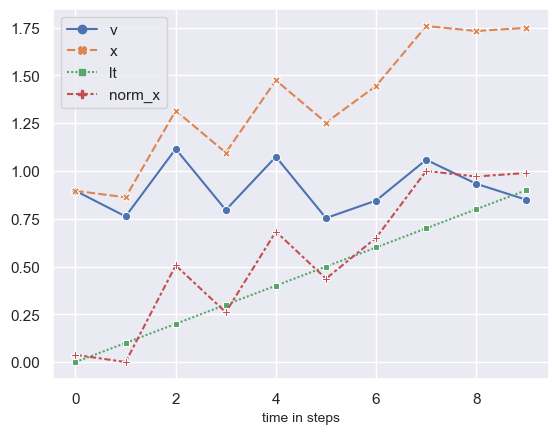

In [29]:
#defining timeseries
timesteps = 10 # 10

#values
min_v = 0.75 # 0.75 # 1 
max_v = 1.25 # 1.25 # 2

#creating random values
vs = np.random.uniform(min_v, max_v, timesteps)

#adding linear trend
to_add = 0.1 # 0.1
end4lts = timesteps * to_add
lts = np.arange(0, end4lts, to_add)

#result xs
xs = np.add(vs, lts)

# normalizing data
normalized_xs = (xs-np.min(xs))/(np.max(xs)-np.min(xs))

source_df = pd.DataFrame({"v": vs,
                   "x": xs,
                   "lt": lts,
                   "norm_x": normalized_xs
                   })
source_plot = sns.lineplot(data= source_df, markers=True)
source_plot.set_xlabel("time in steps", fontsize = 10)


RNN cell in for-loop

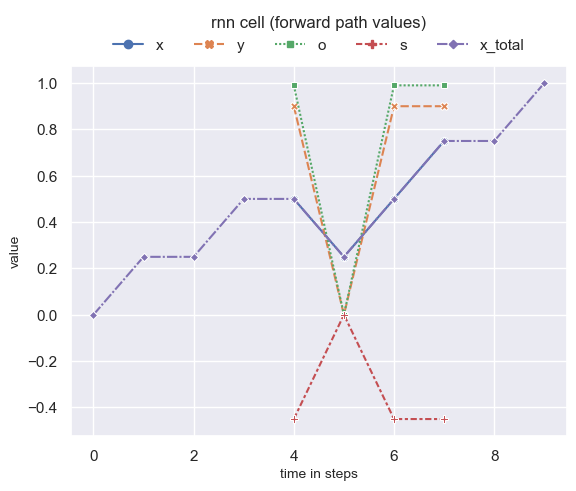

In [25]:

# 10 datapoints example
normalized_xs = [0, 0.25, 0.25, 0.5, 0.5, 0.25, 0.5, 0.75, 0.75, 1]

number_of_last_points = 2 # points that represent the (ground truth) future
points_to_go_backwars = 3 # sequence length

# weights
w1 = 1.8    # 1.8
w2 = -0.5   #-0.5
w3 = 1.1    # 1.1

# biases
b1 = 0.0    # 0.0
b2 = 0.0    # 0.0

# initialization
s0 = 0
df = pd.DataFrame()
ys = []
os = []
ss = []

# selecting scope
number_of_data_points = len(normalized_xs) # equals timesteps
points_going_backwards = points_to_go_backwars + number_of_last_points + 1 
xs = normalized_xs[-points_going_backwards : number_of_data_points-number_of_last_points]

# creating nan_array_front for plotting
nan_array_front = np.empty(number_of_data_points-points_going_backwards)
nan_array_front[:] = np.nan
ys = list(nan_array_front)
os = list(nan_array_front)
ss = list(nan_array_front)

tmp_xs = list(nan_array_front)

# rnn cell (forward path)
for x in xs:
    y0 = relu((x * w1) + b1 + s0)
    s0 = y0 * w2
    o0 = y0 * w3 + b2

    ys.append(y0)
    os.append(o0)
    ss.append(s0)

# creating nan_array_end for plotting
nan_array_end = np.empty(number_of_last_points)
nan_array_end[:] = np.nan
nan_array_end = list(nan_array_end)
tmp_ys = np.concatenate((ys, nan_array_end))
ys = list(tmp_ys)
tmp_os = np.concatenate((os, nan_array_end))
os = list(tmp_os)
tmp_ss = np.concatenate((ss, nan_array_end))
ss = list(tmp_ss)
tmp_xs = np.concatenate((tmp_xs, xs, nan_array_end))
xs = list(tmp_xs)

# fitting everything into dataframe
df = pd.DataFrame({"x": xs,
                   "y": ys,
                   "o": os,
                   "s": ss,
                   "x_total": normalized_xs
                   })

# plotting results
lineplot = sns.lineplot(data= df, markers=True)
lineplot.set_xlabel("time in steps", fontsize = 10)
lineplot.set_ylabel("value", fontsize = 10)
sns.move_legend(
    lineplot, "lower center",
    bbox_to_anchor=(.5, 1), ncol=5, title="rnn cell (forward path values)", frameon=False,
)